Methods of Classification:

Logistic Regression, Random Forest, KNN

Data source: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier


Observations

In [2]:
df1=pd.read_csv('https://raw.githubusercontent.com/YounaRhymesWithTuna/Classification_Car_Insurance/main/train.csv')


In [3]:
df1.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


Text(0.5, 1.0, 'Percent of People Who Filed a Claim in 6 months')

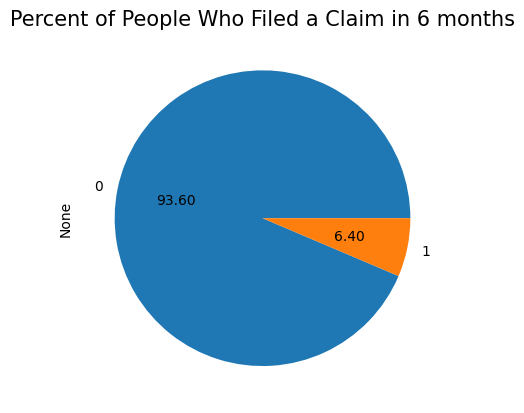

In [4]:
pii=df1.groupby('is_claim').size().plot(kind='pie',autopct='%.2f')
pii.set_title('Percent of People Who Filed a Claim in 6 months', size=15)

In [5]:
print(df1.isnull().sum().sum())
print(df1.duplicated().sum().sum())

0
0


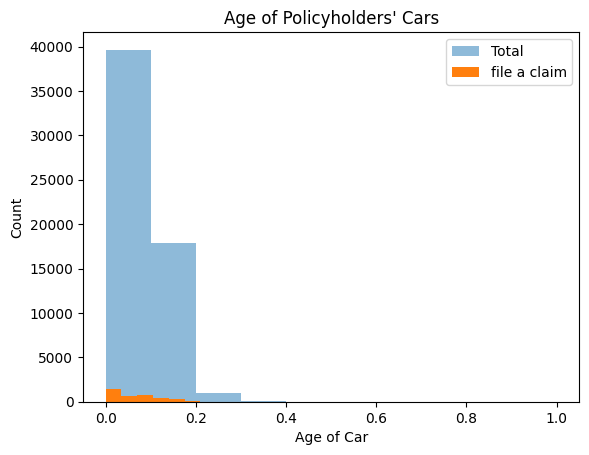

In [6]:
plt.hist(df1['age_of_car'], label='Total',alpha=0.5)
plt.hist(df1.loc[df1['is_claim']==1,'age_of_car'],label='file a claim')
 
plt.legend(loc='upper right')
plt.title("Age of Policyholders' Cars")
plt.xlabel("Age of Car")
plt.ylabel("Count")
plt.show()

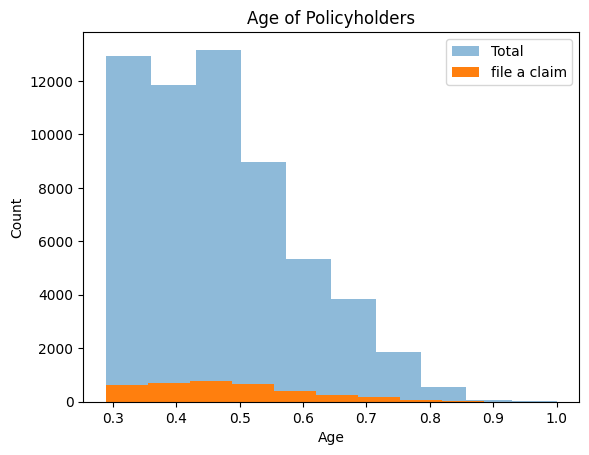

In [7]:
plt.hist(df1['age_of_policyholder'], 
         label='Total',alpha=0.5)
  
plt.hist(df1.loc[df1['is_claim']==1,'age_of_policyholder'], label='file a claim')
  
plt.legend(loc='upper right')
plt.title("Age of Policyholders")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

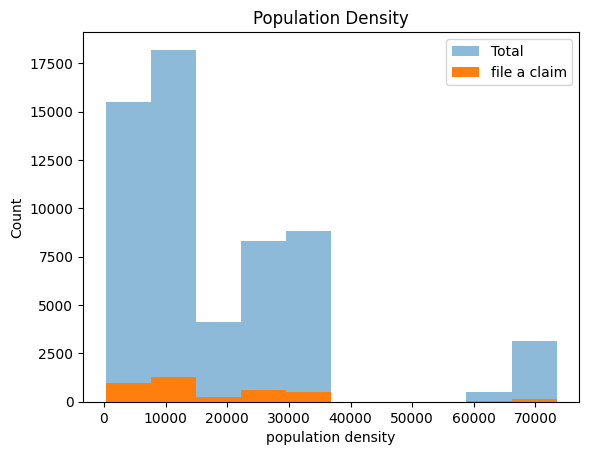

In [8]:
plt.hist(df1['population_density'], 
         label='Total',alpha=0.5)
  
plt.hist(df1.loc[df1['is_claim']==1,'population_density'], label='file a claim')
  
plt.legend(loc='upper right')
plt.title("Population Density")
plt.xlabel("population density")
plt.ylabel("Count")
plt.show()

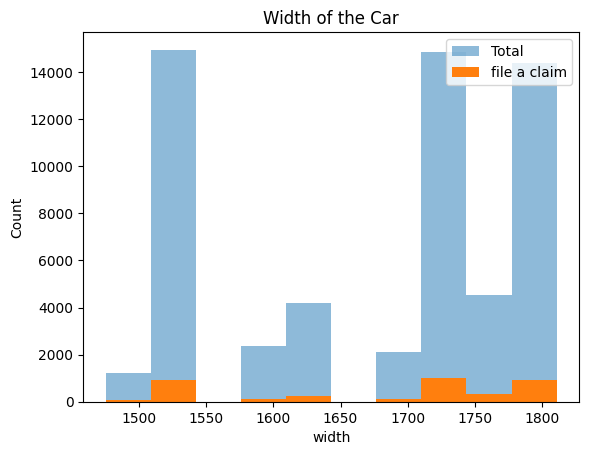

In [9]:
plt.hist(df1['width'], label='Total',alpha=0.5)
  
plt.hist(df1.loc[df1['is_claim']==1,'width'], label='file a claim')
  
plt.legend(loc='upper right')
plt.title("Width of the Car")
plt.xlabel("width")
plt.ylabel("Count")
plt.show()

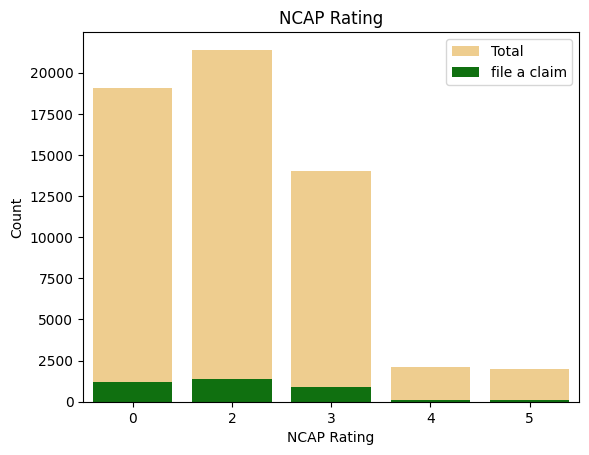

In [10]:
sns.countplot(x=df1['ncap_rating'], data=df1, label='Total', alpha=.5, color='orange')
sns.countplot(x=df1.loc[df1['is_claim']==1,'ncap_rating'], data=df1,label='file a claim', color='green')
  
plt.legend(loc='upper right')
plt.title("NCAP Rating")
plt.xlabel("NCAP Rating")
plt.ylabel("Count")
plt.show()

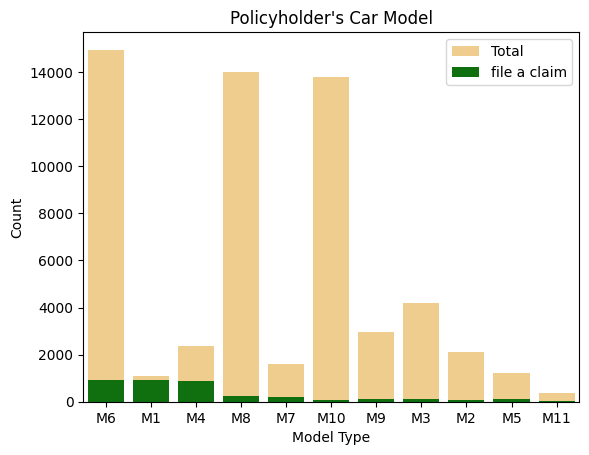

In [11]:
sns.countplot(x=df1['model'], data=df1, label='Total', alpha=.5, color='orange')
sns.countplot(x=df1.loc[df1['is_claim']==1,'model'], data=df1,label='file a claim', color='green')
  
plt.legend(loc='upper right')
plt.title("Policyholder's Car Model")
plt.xlabel("Model Type")
plt.ylabel("Count")
plt.show()

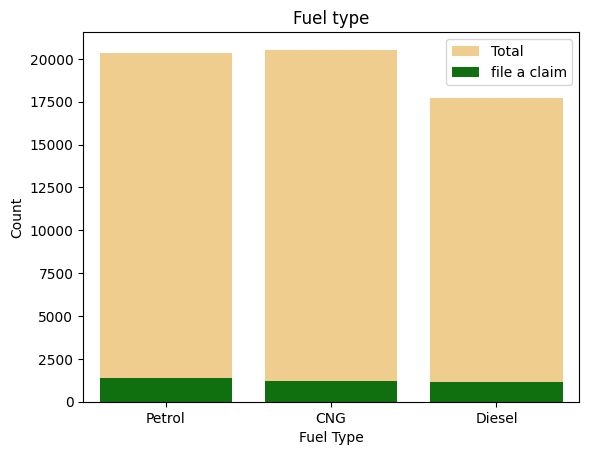

In [12]:
sns.countplot(x=df1['fuel_type'], data=df1, label='Total', alpha=.5, color='orange')
sns.countplot(x=df1.loc[df1['is_claim']==1,'fuel_type'], data=df1,label='file a claim', color='green')
  
plt.legend(loc='upper right')
plt.title("Fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

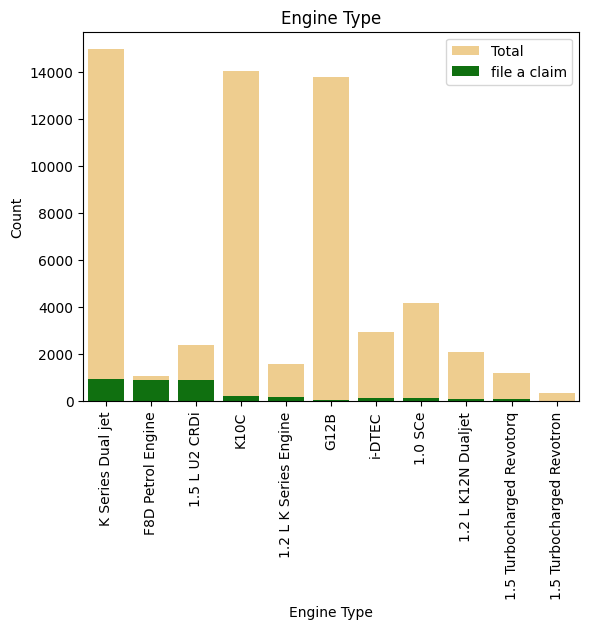

In [13]:
sns.countplot(x=df1['engine_type'], data=df1, label='Total', alpha=.5, color='orange')
sns.countplot(x=df1.loc[df1['is_claim']==1,'engine_type'], data=df1,label='file a claim', color='green')
  
plt.legend(loc='upper right')
plt.title("Engine Type")
plt.xlabel("Engine Type")
plt.xticks(rotation=90) 
plt.ylabel("Count")
plt.show()

In [14]:
# Are the X's highly correlated? (Only 2 continuous variables are highly correlated and dropped.)
correlated_X=set()
correlation_matrix=df1.corr()
threshold=.90

for i in range (len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>threshold:
            correlated_X.add(correlation_matrix.columns[i])
            
print(correlated_X)

{'length', 'width'}


In [15]:
df1.drop(['width','length'], axis=1, inplace=True)

In [16]:
# To create dummy variables:
col= ['area_cluster','make','segment','model','fuel_type','max_torque','max_power','engine_type','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','rear_brakes_type','transmission_type','steering_type','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','ncap_rating']
df1 = pd.get_dummies(df1, drop_first=True ,columns=col, prefix= col, prefix_sep="_")
df1.drop('policy_id', axis=1, inplace=True)
df2=df1.copy(deep=True)
df2.head(2)

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,height,...,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,0.515874,0.05,0.644231,4990,2,796,3,5,4.6,1475,...,0,1,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,27003,2,796,3,5,4.6,1475,...,0,1,0,0,0,1,0,0,0,0


Method 1: 
Logistic Regression Classification with L1 Feature Selection

(Starting with Assumption Checks)

In [17]:
# Are continuous X linearly related to log odds?
continuous_X=['policy_tenure','age_of_car','age_of_policyholder','population_density','airbags','displacement','cylinder','gear_box','turning_radius','height','gross_weight']
df_assumption=df2.copy(deep=True)


for i in continuous_X:  
    df_assumption=df_assumption.drop(df_assumption[df_assumption[i]==0].index)  
    df_assumption[f'{i}*log{ i}']=df_assumption[i].apply(lambda x: x* np.log(x))
    
df_assumption.head(4)

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,height,...,age_of_car*logage_of_car,age_of_policyholder*logage_of_policyholder,population_density*logpopulation_density,airbags*logairbags,displacement*logdisplacement,cylinder*logcylinder,gear_box*loggear_box,turning_radius*logturning_radius,height*logheight,gross_weight*loggross_weight
0,0.515874,0.05,0.644231,4990,2,796,3,5,4.6,1475,...,-0.149787,-0.283267,42490.804032,1.386294,5316.960952,3.295837,8.04719,7.019859,10762.209571,8386.835193
1,0.672619,0.02,0.375000,27003,2,796,3,5,4.6,1475,...,-0.078240,-0.367811,275530.598858,1.386294,5316.960952,3.295837,8.04719,7.019859,10762.209571,8386.835193
2,0.841110,0.02,0.384615,4076,2,796,3,5,4.6,1475,...,-0.078240,-0.367504,33883.263803,1.386294,5316.960952,3.295837,8.04719,7.019859,10762.209571,8386.835193
3,0.900277,0.11,0.432692,21622,2,1197,4,5,4.8,1515,...,-0.242800,-0.362479,215819.270692,1.386294,8483.825726,5.545177,8.04719,7.529356,11094.603638,9607.576572


In [18]:
columns_keep= continuous_X+df_assumption.columns.tolist()[-len(continuous_X):]
X_assumption=df_assumption[columns_keep]
y_assumption=df_assumption['is_claim']

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families 

X_assumption=sm.add_constant(X_assumption,prepend=False)
result=GLM(y_assumption, X_assumption, family=families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_claim   No. Observations:                53335
Model:                            GLM   Df Residuals:                    53316
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11667.
Date:                Sun, 01 Jan 2023   Deviance:                       23334.
Time:                        21:37:10   Pearson chi2:                 5.37e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01518
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [19]:
# Ho: B=0, Ha: B!=0
# If null hypothesis of an interaction term is true, the variables are linearly related to log odds. We can drop variables with interaction terms where p value < .05
df2.drop(['policy_tenure','age_of_car','population_density'],axis=1,inplace=True)


In [20]:
# df2.columns

In [21]:
X=df2[['age_of_policyholder', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'height', 'gross_weight',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'make_2',
       'make_4', 'make_5', 'segment_B1', 'segment_B2', 'segment_C1',
       'segment_Utility', 'model_M11', 'model_M2', 'model_M5', 'model_M6',
       'model_M7', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'max_torque_60Nm@3500rpm', 'max_power_88.50bhp@6000rpm',
       'is_parking_camera_Yes', 'steering_type_Power', 'ncap_rating_2']]
y=df2['is_claim']

In [22]:
print(y.shape, X.shape)

(58592,) (58592, 48)


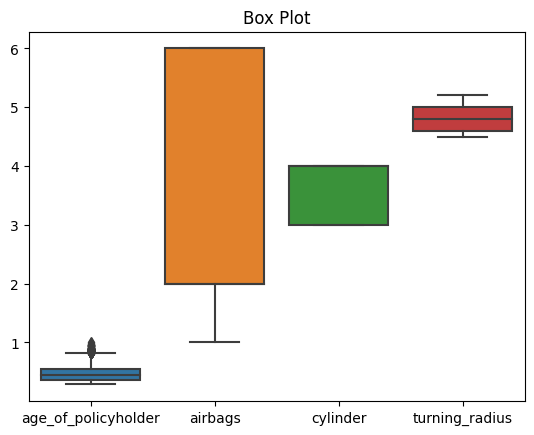

In [23]:
# No significant outliers
box = sns.boxplot(data= df2[['age_of_policyholder', 'airbags',  'cylinder', 'turning_radius']]).set_title("Box Plot")


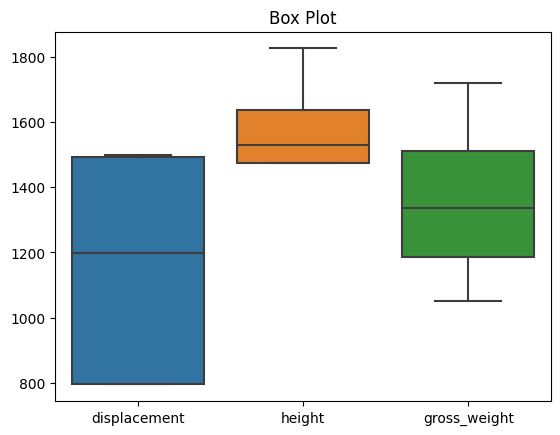

In [24]:
box2=sns.boxplot(data= df2[['displacement', 'height', 'gross_weight']]).set_title("Box Plot")

In [25]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=.3, random_state=1)
scaler = StandardScaler()

X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)


In [26]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

parameter_grid={"C":[.001, .01, .1, 1, 10, 100]}
logreg=LogisticRegression(penalty='l1', solver='liblinear',class_weight='balanced')
grid_search=GridSearchCV(estimator=logreg, param_grid=parameter_grid, scoring='roc_auc',cv=5)
grid_search.fit(X_train_,y_train)
print('Best Hyperparameter: ' ,grid_search.best_params_, '\n', 'Best ROC_AUC Score: ', grid_search.best_score_)
#High C means less regularization


Best Hyperparameter:  {'C': 0.01} 
 Best ROC_AUC Score:  0.5454694081592286


In [27]:
# from sklearn.feature_selection import SelectFromModel

selection_=SelectFromModel(LogisticRegression(penalty='l1', C=.1, solver='liblinear',class_weight='balanced')) 
selection_.fit(X_train_, y_train)


SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [28]:
selected_feat = X_train.columns[(selection_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(selection_.estimator_.coef_ == 0)))


total features: 48
selected features: 32
features with coefficients shrank to zero: 16


In [29]:
selected_feat

Index(['age_of_policyholder', 'area_cluster_C10', 'area_cluster_C11',
       'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14',
       'area_cluster_C15', 'area_cluster_C16', 'area_cluster_C17',
       'area_cluster_C18', 'area_cluster_C19', 'area_cluster_C2',
       'area_cluster_C20', 'area_cluster_C21', 'area_cluster_C22',
       'area_cluster_C3', 'area_cluster_C4', 'area_cluster_C5',
       'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8',
       'area_cluster_C9', 'make_2', 'make_5', 'segment_B1', 'segment_Utility',
       'model_M11', 'model_M2', 'model_M5', 'model_M6', 'model_M7',
       'is_parking_camera_Yes'],
      dtype='object')

In [30]:
# VIF keep if below 10:
X_vif=df2[['age_of_policyholder',  'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13',
       'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16',
       'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19',
       'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21',
       'area_cluster_C22', 'area_cluster_C3', 'area_cluster_C4',
       'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8',
       'area_cluster_C9', 'make_2', 'make_5', 'segment_B1', 'segment_Utility',
       'model_M11', 'model_M2', 'model_M5', 'model_M6', 'model_M7']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif['X_val']=X_vif.columns
vif
#cylinder dropped


,VIF,X_val
0,5.242278,age_of_policyholder
1,1.256130,area_cluster_C10
2,1.115736,area_cluster_C11
3,1.141034,area_cluster_C12
4,1.278574,area_cluster_C13
5,1.333957,area_cluster_C14
6,1.058511,area_cluster_C15
7,1.032521,area_cluster_C16
8,1.038716,area_cluster_C17
9,1.018085,area_cluster_C18


In [31]:
X=df2[['age_of_policyholder', 'cylinder', 'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13',
       'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16',
       'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19',
       'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21',
       'area_cluster_C22', 'area_cluster_C3', 'area_cluster_C4',
       'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8',
       'area_cluster_C9', 'make_2', 'make_5', 'segment_B1', 'segment_Utility',
       'model_M11', 'model_M2', 'model_M5', 'model_M6', 'model_M7']]
y=df2['is_claim']
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=.3, random_state=1)

In [32]:
# Logistic Regression
clf=LogisticRegression(penalty='l1', C=.1, solver='liblinear',class_weight='balanced').fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [33]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4844123335988167

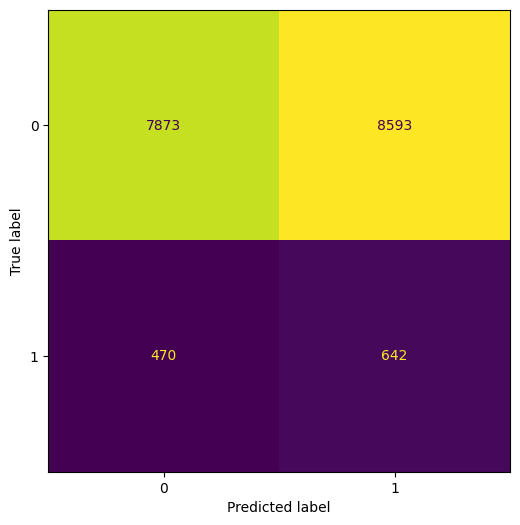

In [34]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=clf.classes_, ax=ax, colorbar=False)
plt.show()


In [35]:
#For accuracy, precision, recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.48      0.63     16466
           1       0.07      0.58      0.12      1112

    accuracy                           0.48     17578
   macro avg       0.51      0.53      0.38     17578
weighted avg       0.89      0.48      0.60     17578



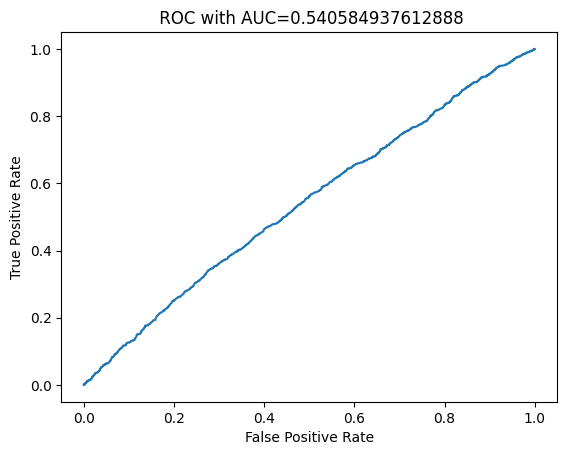

In [36]:
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba[:, 1])
auc = metrics.roc_auc_score(y_test, y_pred_proba[:, 1])
#ROC, AUC 
plt.plot(fpr,tpr)
plt.title(f" ROC with AUC={auc}")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Method 2: Random Forest

In [37]:
df3=df1.copy(deep=True)
X=df3[df3.columns.drop('is_claim')]
y=df3['is_claim']
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=.3, random_state=1)

In [38]:
# from sklearn.model_selection import GridSearchCV
# from imblearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state = 10, class_weight='balanced')
param={'max_depth':[5, 10], 'n_estimators':[100],'max_features':['log2','sqrt'],'min_samples_leaf':[5,10], 'criterion':['gini']}
clf1 = GridSearchCV(forest_model, param, n_jobs= -1, cv=5, scoring='accuracy',error_score="raise" )
clf1.fit(X_train, y_train)
print('Best Hyperparameter: ',clf1.best_params_, '\n', 'Best Accuracy Score: ', clf1.best_score_, '\n')


Best Hyperparameter:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 100} 
 Best Accuracy Score:  0.6552643193236438 



In [39]:
s1= clf1.score(X_train, y_train)
s2=clf1.score(X_test,y_test)
print(f'Random forest train and test accuracy: {s1: .3f}, {s2:.3f}')

Random forest train and test accuracy:  0.657, 0.642


In [40]:
y_test_pred = clf1.predict(X_test)
y_test_pred

array([0, 0, 1, ..., 0, 0, 1])

In [41]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)


0.6419956764136989

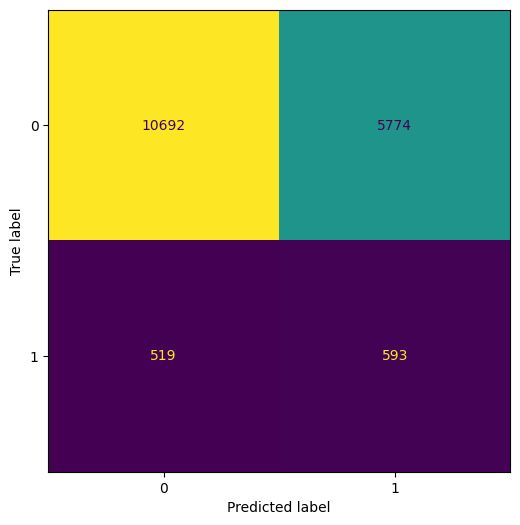

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels=clf.classes_, ax=ax, colorbar=False)
plt.show()


In [43]:
# from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     16466
           1       0.09      0.53      0.16      1112

    accuracy                           0.64     17578
   macro avg       0.52      0.59      0.47     17578
weighted avg       0.90      0.64      0.73     17578



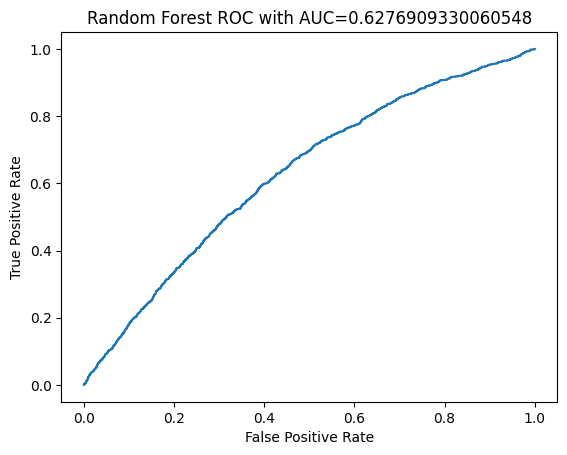

In [44]:
y_pred_proba=clf1.predict_proba(X_test)
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba[:,1])
auc=metrics.roc_auc_score(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.title(f'Random Forest ROC with AUC={auc}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Text(0.5, 0, 'Variable Importance')

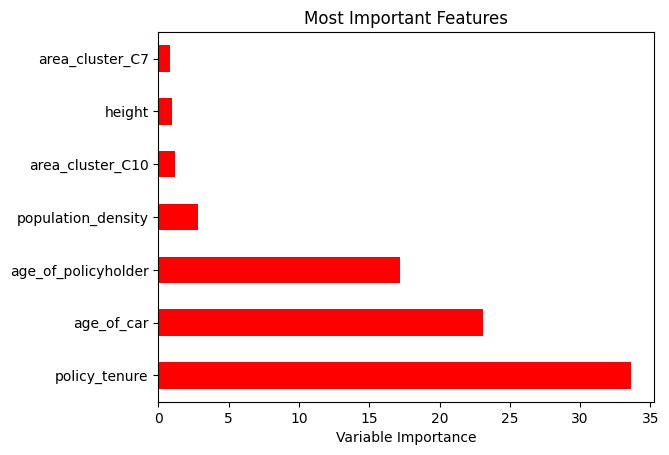

In [45]:
# Feature selections
Importance = pd.DataFrame({'Importance': clf1.best_estimator_.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True)
Importance['Importance'].nlargest(7).plot(kind='barh', color='r', title='Most Important Features')
plt.xlabel('Variable Importance')


In [46]:
# Random Forest Using Selected Features:
X1=df3[['policy_tenure','age_of_car','age_of_policyholder','population_density','area_cluster_C10']]
y1=df3['is_claim']
X_train, X_test,y_train, y_test= train_test_split(X1,y1, test_size=.3, random_state=1)

In [47]:
forest_model = RandomForestClassifier(random_state = 10, class_weight='balanced')
param={'max_depth':[5, 10], 'n_estimators':[100],'max_features':['log2','sqrt'],'min_samples_leaf':[5,10], 'criterion':['gini']}
clf1_f = GridSearchCV(forest_model, param, n_jobs= -1, cv=5, scoring='accuracy',error_score="raise" )
clf1_f.fit(X_train, y_train)
print('Best Hyperparameter: ',clf1_f.best_params_, '\n', 'Best Accuracy Score: ', clf1_f.best_score_, '\n')


Best Hyperparameter:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 100} 
 Best Accuracy Score:  0.6683080808869 



In [48]:
y_test_pred = clf1_f.predict(X_test)
y_test_pred
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     16466
           1       0.09      0.49      0.15      1112

    accuracy                           0.65     17578
   macro avg       0.52      0.57      0.46     17578
weighted avg       0.90      0.65      0.74     17578



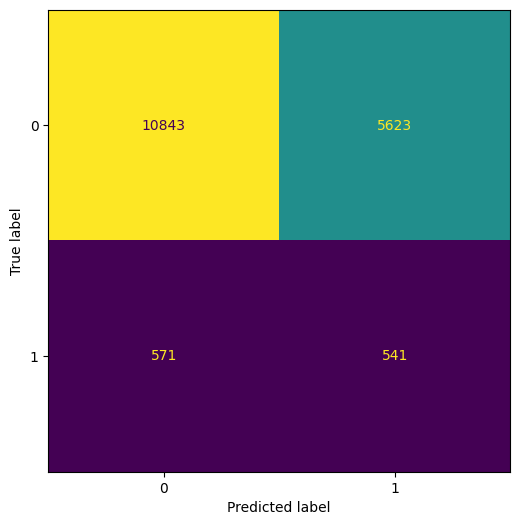

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels=clf.classes_, ax=ax, colorbar=False)
plt.show()

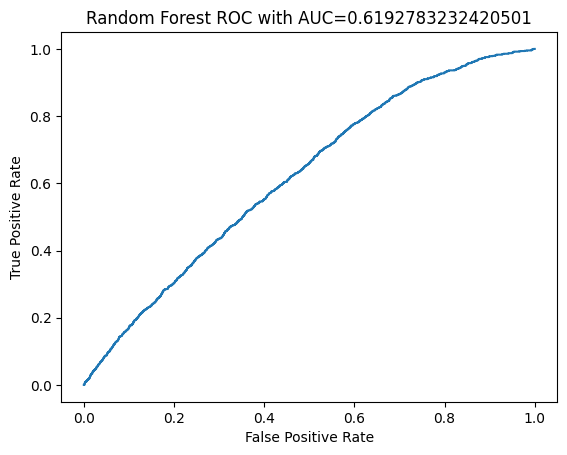

In [50]:
y_pred_proba=clf1_f.predict_proba(X_test)
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba[:,1])
auc=metrics.roc_auc_score(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.title(f'Random Forest ROC with AUC={auc}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Method 3: KNN

In [51]:
df4=df1.copy(deep=True)

In [52]:
# Resampling (Undersampling) since class_weight='balanced' does not work on KNeighborsClassifier:
count_class_0, count_class_1=df4['is_claim'].value_counts()
df4_class_0=df4[df4['is_claim']==0]
df4_class_1=df4[df4['is_claim']==1]
df4_class_0_undersampled=df4_class_0.sample(count_class_1, random_state=28)
df4_undersampled=pd.concat([df4_class_0_undersampled,df4_class_1],axis=0)
print('Random under sampling:','\n' ,df4_undersampled['is_claim'].value_counts())


Random under sampling: 
 0    3748
1    3748
Name: is_claim, dtype: int64


In [53]:
# Using only the important features from Random Forest found above
X=df4_undersampled[['policy_tenure','age_of_car','age_of_policyholder','population_density','area_cluster_C10']]
y=df4_undersampled['is_claim']

In [54]:
X_train_knn, X_test_knn,y_train_knn, y_test_knn= train_test_split(X,y, test_size=.3, random_state=12)

In [55]:
# from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
X_train_knn = standard.fit_transform(X_train_knn)
X_test_knn = standard.transform(X_test_knn)

In [56]:
# from sklearn.neighbors import KNeighborsClassifier
# finding the best value, k
scores_accu=np.zeros(33)
i=0
for j in range(1,100,3):
    neigh=KNeighborsClassifier(n_neighbors=j).fit(X_train_knn,y_train_knn)
    y_pred_knn=neigh.predict(X_test_knn)
    scores_accu[i]=metrics.accuracy_score(y_test_knn,y_pred_knn)
    i+=1
scores_accu

array([0.52512228, 0.53223655, 0.55713651, 0.56291685, 0.56825256,
       0.57225434, 0.58603824, 0.58114718, 0.57670076, 0.57358826,
       0.58337039, 0.5855936 , 0.59137394, 0.59004002, 0.59626501,
       0.59359715, 0.59048466, 0.59359715, 0.59270787, 0.59759893,
       0.59804357, 0.5993775 , 0.59804357, 0.5909293 , 0.59582036,
       0.59715429, 0.59759893, 0.59181859, 0.59137394, 0.59315251,
       0.58826145, 0.58692752, 0.58603824])

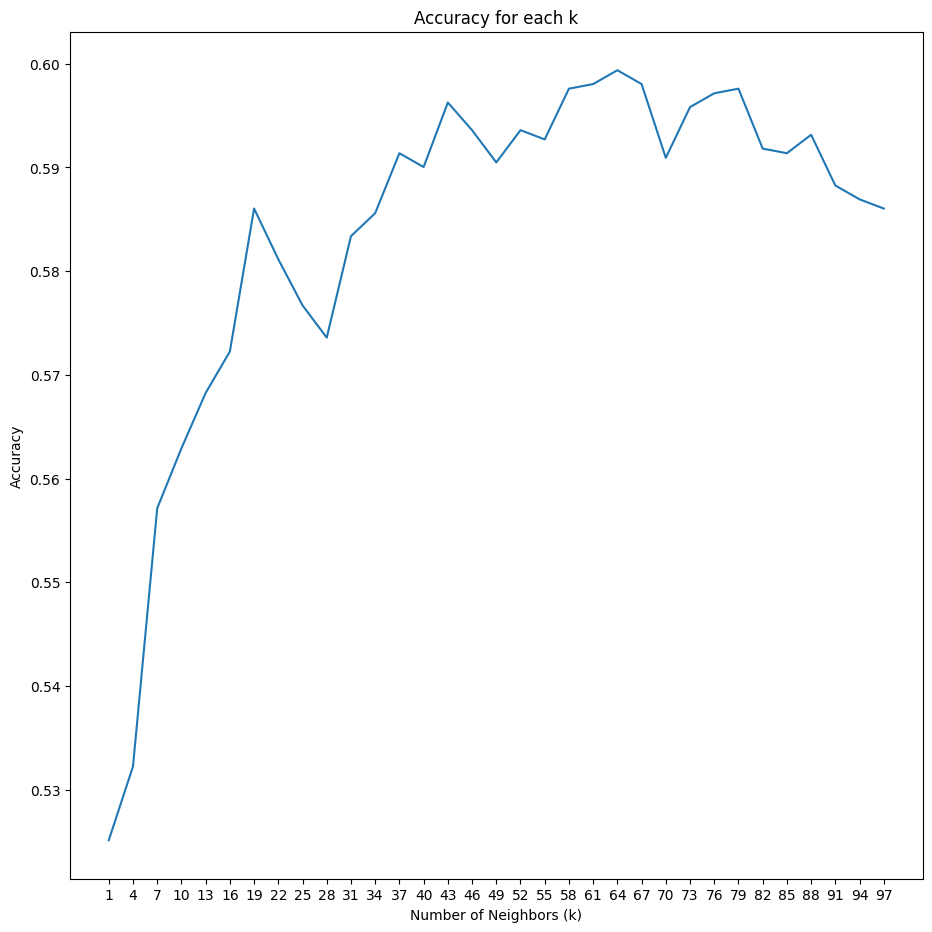

In [57]:
plt.figure(figsize=(11,11))
plt.plot(range(1,100,3),scores_accu)
plt.xticks( range(1,100,3))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy for each k')
plt.show()


In [58]:
neigh = KNeighborsClassifier()
grid_param={'n_neighbors':[62,63,64,65],'weights':['uniform','distance'],'metric':['minkowski','euclidean']}
clf6= GridSearchCV(neigh,grid_param,cv=3,n_jobs=-1)
clf6.fit(X_train_knn, y_train_knn)
print('Best Hyperparameter: ',clf6.best_params_, '\n', 'Best Accuracy Score: ', clf6.best_score_, '\n')


Best Hyperparameter:  {'metric': 'minkowski', 'n_neighbors': 64, 'weights': 'distance'} 
 Best Accuracy Score:  0.5820468839336764 



In [59]:
y_pred = clf6.predict(X_test_knn)
print('Test accuracy:',metrics.accuracy_score(y_test_knn,y_pred))

Test accuracy: 0.5904846598488217


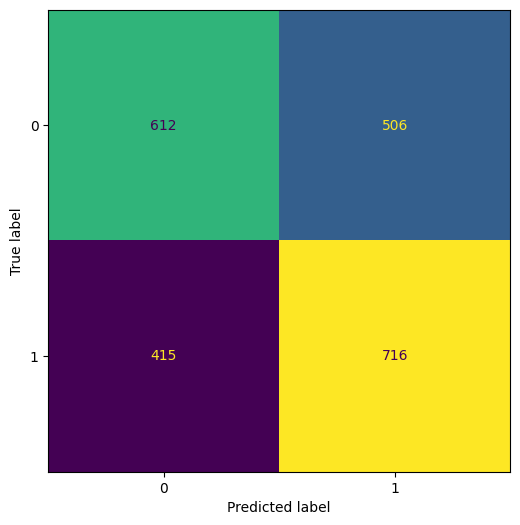

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_knn, y_pred, labels=clf6.classes_, ax=ax, colorbar=False)
plt.show()

In [61]:
# from sklearn.metrics import classification_report
print(classification_report(y_test_knn,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      1118
           1       0.59      0.63      0.61      1131

    accuracy                           0.59      2249
   macro avg       0.59      0.59      0.59      2249
weighted avg       0.59      0.59      0.59      2249



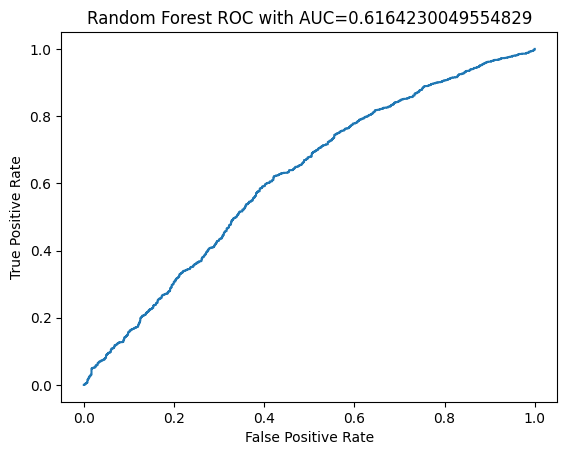

In [62]:
y_pred_proba=clf6.predict_proba(X_test_knn)
fpr,tpr,_=metrics.roc_curve(y_test_knn,y_pred_proba[:,1])
auc=metrics.roc_auc_score(y_test_knn,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.title(f'Random Forest ROC with AUC={auc}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Prediction Using the New Data & Our Best Model:

In [63]:
df_new_data=pd.read_csv('https://raw.githubusercontent.com/YounaRhymesWithTuna/Classification_Car_Insurance/main/test.csv')


In [64]:
col= ['area_cluster','make','segment','model','fuel_type','max_torque','max_power','engine_type','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','rear_brakes_type','transmission_type','steering_type','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','ncap_rating']
df_new_data = pd.get_dummies(df_new_data, drop_first=True ,columns=col, prefix= col, prefix_sep="_")
df_new_data.drop(['width','length','policy_id'], axis=1, inplace=True)

In [65]:
df_new_data.head(4)

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,height,...,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,0.341732,0.00,0.586538,4076,2,796,3,5,4.6,1475,...,0,1,0,0,0,1,0,0,0,0
1,0.307241,0.13,0.442308,8794,2,1197,4,5,4.8,1530,...,1,1,1,1,1,1,1,0,0,0
2,0.327924,0.12,0.451923,8794,2,999,3,5,5.0,1490,...,1,1,0,1,1,1,1,0,0,0
3,0.782654,0.01,0.461538,34738,2,796,3,5,4.6,1475,...,0,1,0,0,0,1,0,0,0,0


In [66]:
y_pred = clf1.predict(df_new_data)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [67]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([24713, 14350]))